In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
# load dataset 
df = pd.read_csv('icij-solitary-voices-final-dataset-for-publication.csv')

In [3]:
#looking at preliminary shape, data types, etc. 
df.head()


,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch
0,1,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,"Apr 30, 2012",2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Jun 27, 2013",423.0,no,no
1,2,Sierra Leone,sierra_leone,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,"May 30, 2012",2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,"Oct 30, 2013",518.0,no,no
2,3,El Salvador,el_salvador,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,"Jul 12, 2012",2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Mar 07, 2013",208.0,no,no
3,4,Iraq,iraq,SND (San Diego),CA,CA - San Diego Contract Detention Facility - C...,san_diego_contract_detention_facility_cca_otay_ca,"Jul 25, 2012",2012,Mental Illness,mental_illness,"Nov 13, 2013",476.0,yes,no
4,5,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,"Aug 17, 2012",2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,"Aug 11, 2013",448.0,no,no


In [4]:
display(df)

,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch
0,1,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,"Apr 30, 2012",2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Jun 27, 2013",423.0,no,no
1,2,Sierra Leone,sierra_leone,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,"May 30, 2012",2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,"Oct 30, 2013",518.0,no,no
2,3,El Salvador,el_salvador,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,"Jul 12, 2012",2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Mar 07, 2013",208.0,no,no
3,4,Iraq,iraq,SND (San Diego),CA,CA - San Diego Contract Detention Facility - C...,san_diego_contract_detention_facility_cca_otay_ca,"Jul 25, 2012",2012,Mental Illness,mental_illness,"Nov 13, 2013",476.0,yes,no
4,5,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,"Aug 17, 2012",2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,"Aug 11, 2013",448.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8483,8484,Guatemala,guatemala,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 02, 2017",2017,Protective Custody: Other Detainee Safety,protective_custody_other_detainee_safety,"Feb 17, 2017",5.0,yes,no
8484,8485,Dominican Republic,dominican_republic,PHI (Philadelphia),PA,PA - Pike County Correctional Facility,pike_county_correctional_facility_pa,"Dec 02, 2017",2017,Disciplinary,disciplinary,"Sep 03, 2017",25.0,no,no
8485,8486,Honduras,honduras,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 03, 2017",2017,Facility Security Threat: Other,facility_security_threat_other,NaN,NaN,yes,no
8486,8487,Mexico,mexico,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 03, 2017",2017,Facility Security Threat: Other,facility_security_threat_other,NaN,NaN,yes,no


In [5]:
df.tail()

,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch
8483,8484,Guatemala,guatemala,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 02, 2017",2017,Protective Custody: Other Detainee Safety,protective_custody_other_detainee_safety,"Feb 17, 2017",5.0,yes,no
8484,8485,Dominican Republic,dominican_republic,PHI (Philadelphia),PA,PA - Pike County Correctional Facility,pike_county_correctional_facility_pa,"Dec 02, 2017",2017,Disciplinary,disciplinary,"Sep 03, 2017",25.0,no,no
8485,8486,Honduras,honduras,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 03, 2017",2017,Facility Security Threat: Other,facility_security_threat_other,NaN,NaN,yes,no
8486,8487,Mexico,mexico,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 03, 2017",2017,Facility Security Threat: Other,facility_security_threat_other,NaN,NaN,yes,no
8487,8488,Iran,iran,NaN,CA,CA - Adelanto Correctional Facility,adelanto_correctional_facility_ca,"Dec 03, 2017",2017,Protective Custody: Other Detainee Safety,protective_custody_other_detainee_safety,"Mar 17, 2017",5.0,yes,yes


In [6]:
len(df)

8488

In [7]:
df.shape

(8488, 15)

In [8]:
df.dtypes

record_id                 int64
citizenship              object
citizenship_id           object
facility_aor             object
state                    object
facility                 object
facility_id              object
placement_date           object
year                      int64
placement_reason         object
placement_reason_raw     object
release_date             object
days_solitary           float64
mental_illness           object
no_suicide_watch         object
dtype: object

In [9]:
#drop all entries that have n/a for days in solitary 
df.dropna(subset = ['days_solitary'])

,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch
0,1,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,"Apr 30, 2012",2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Jun 27, 2013",423.0,no,no
1,2,Sierra Leone,sierra_leone,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,"May 30, 2012",2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,"Oct 30, 2013",518.0,no,no
2,3,El Salvador,el_salvador,SLC (Salt Lake City),NV,NV - Henderson Detention Center,henderson_detention_center_nv,"Jul 12, 2012",2012,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Mar 07, 2013",208.0,no,no
3,4,Iraq,iraq,SND (San Diego),CA,CA - San Diego Contract Detention Facility - C...,san_diego_contract_detention_facility_cca_otay_ca,"Jul 25, 2012",2012,Mental Illness,mental_illness,"Nov 13, 2013",476.0,yes,no
4,5,Mexico,mexico,PHO (Phoenix),AZ,AZ - Eloy Federal Contract Facility,eloy_federal_contract_facility_az,"Aug 17, 2012",2012,Protective Custody: Criminal Offense,protective_custody_criminal_offense,"Aug 11, 2013",448.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,8481,El Salvador,el_salvador,HOU (Houston),TX,TX - Houston Contract Detention Facility,houston_contract_detention_facility_tx,"Dec 01, 2017",2017,Protective Custody: Other Detainee Safety,protective_custody_other_detainee_safety,"Jan 27, 2017",15.0,yes,no
8481,8482,El Salvador,el_salvador,SFR (San Francisco),CA,CA - Sacramento County Jail-rio Cosumnes Corr....,sacramento_county_jail_rio_cosumnes_corr_cente...,"Dec 01, 2017",2017,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Feb 14, 2017",33.0,no,no
8483,8484,Guatemala,guatemala,SNA (San Antonio),TX,TX - South Texas Detention Complex,south_texas_detention_complex_tx,"Dec 02, 2017",2017,Protective Custody: Other Detainee Safety,protective_custody_other_detainee_safety,"Feb 17, 2017",5.0,yes,no
8484,8485,Dominican Republic,dominican_republic,PHI (Philadelphia),PA,PA - Pike County Correctional Facility,pike_county_correctional_facility_pa,"Dec 02, 2017",2017,Disciplinary,disciplinary,"Sep 03, 2017",25.0,no,no


In [10]:
#the count of inmates for each state in solitary 
df.state.value_counts()


CA    2223
TX     987
AZ     715
GA     693
PA     673
LA     521
FL     439
WA     272
VA     271
NV     196
NY     186
NJ     185
MA     159
MN     150
IL     145
AL     130
CO     123
UT      87
MD      87
MI      84
OH      50
NM      33
WI      32
IA      14
NE       8
KS       7
NH       5
KY       5
SC       4
MO       2
MT       1
ID       1
Name: state, dtype: int64

In [11]:
#the count of inmates in solitary by citizenship other than USA
df.citizenship.value_counts()

Mexico         2678
El Salvador     997
Honduras        664
Guatemala       444
Jamaica         264
               ... 
Mauritius         1
Mongolia          1
Bermuda           1
Libya             1
Singapore         1
Name: citizenship, Length: 165, dtype: int64

In [12]:
#the count of inmates in solitary by correctional facility 
df.facility_id.value_counts()

adelanto_correctional_facility_ca                    1256
stewart_detention_center_ga                           616
san_diego_contract_detention_facility_cca_otay_ca     427
york_county_prison_pa                                 423
houston_contract_detention_facility_tx                408
                                                     ... 
pottawattamie_county_jail_ia                            1
bristol_county_jail_new_bedford_ma                      1
cascade_county_jail_mt                                  1
torrance_county_detention_facility_nm                   1
polk_county_jail_ia                                     1
Name: facility_id, Length: 111, dtype: int64

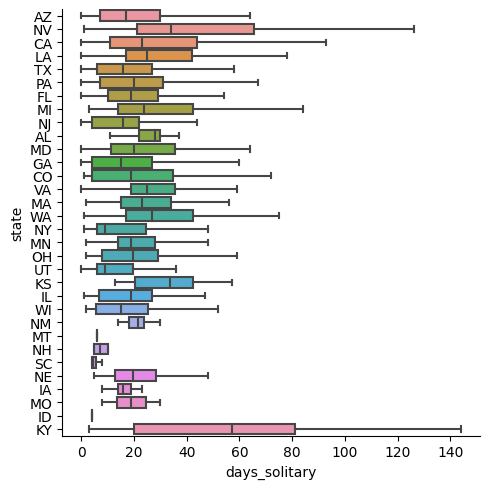

In [13]:
#boxplot visualizing days in solitary by state 

sns.catplot(x='days_solitary', y='state',
            data=df,
            kind='box',
            sym='')

In [14]:
#summary stats of 'days_solitary' column 
print(df['days_solitary'].describe())

count    8293.000000
mean       32.716870
std        49.910964
min         0.000000
25%         9.000000
50%        20.000000
75%        32.000000
max       781.000000
Name: days_solitary, dtype: float64


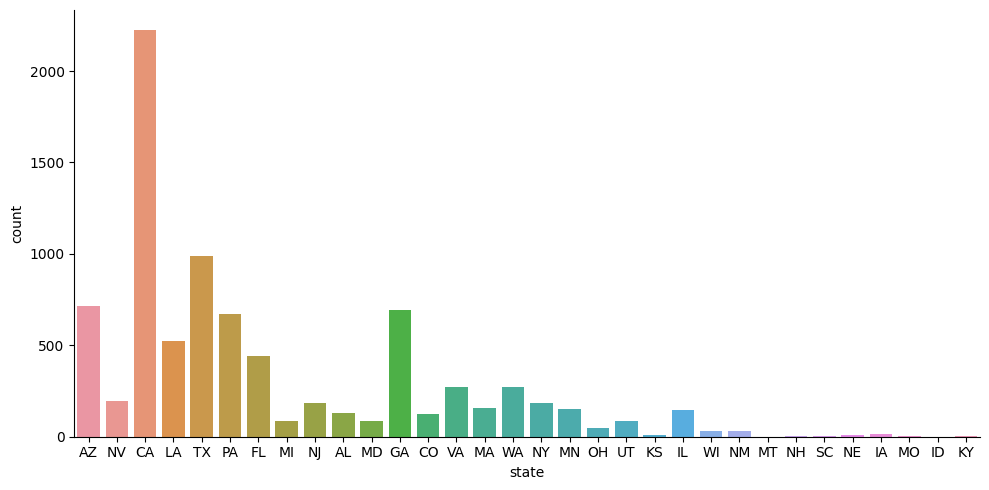

In [17]:
#barchart of count of inmates by state in solitary 
sns.catplot(x='state', data=df, kind='count', aspect=2)
plt.tight_layout()

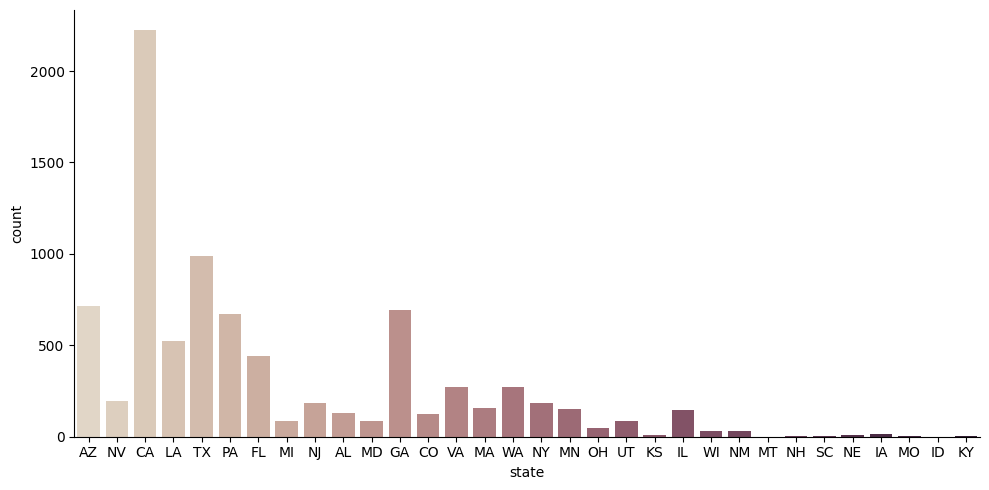

In [18]:
#barchart of count of inmates by state in solitary with a different color palette 
sns.catplot(x='state', data=df, kind='count', aspect=2, palette="ch:.25");
plt.tight_layout();

In [33]:
#barchart mental_illness counts in solitary 
sns.catplot(y='mental_illness', data=df, kind="count")
plt.tight_layout()

ValueError: min() arg is an empty sequence

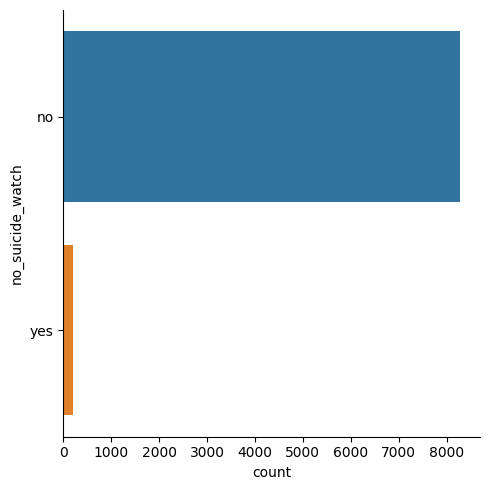

In [37]:
#barcharts suicide watch counts in solitary 
sns.catplot(y='no_suicide_watch', data=df, kind="count")
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/var/folders/br/g11f9tjd44q2lwq6n8gqf2hh0000gn/T/ipykernel_8890/2285033257.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


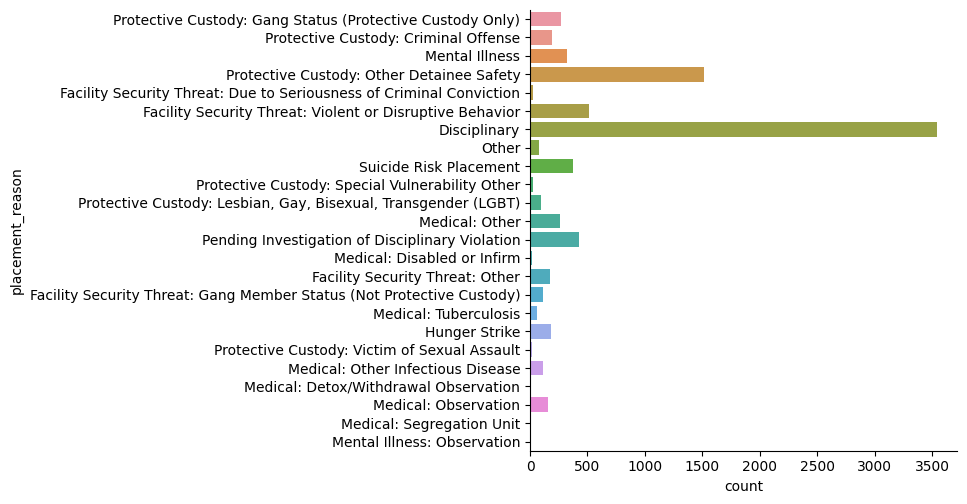

In [38]:
#barchart counts for placement reason in solitary 
sns.catplot(y='placement_reason', data=df, kind="count")
plt.tight_layout()

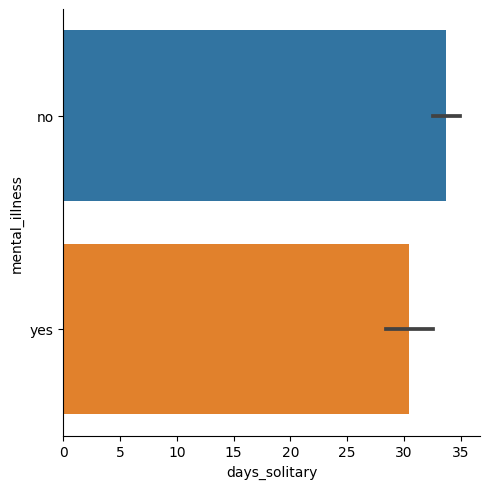

In [39]:
sns.catplot(x='days_solitary', y='mental_illness', data=df, kind='bar')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


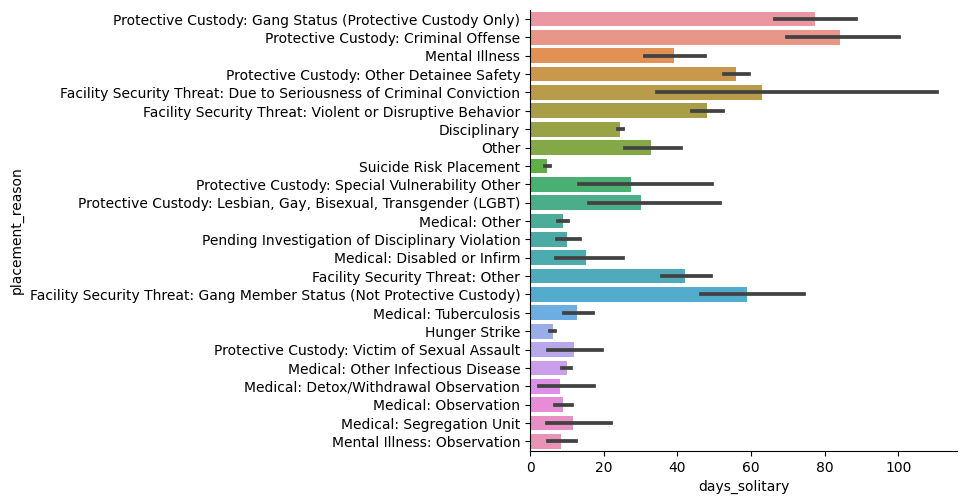

In [28]:
sns.catplot(x='days_solitary', y='placement_reason', data=df, kind='bar')

<AxesSubplot: xlabel='days_solitary', ylabel='Count'>

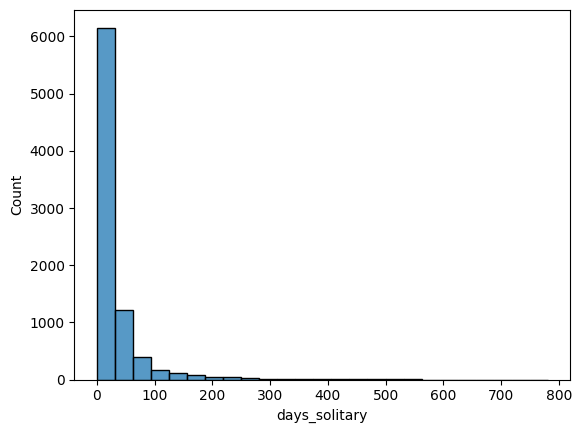

In [27]:
#histogram of days in solitary 
sns.histplot(x=df["days_solitary"], bins = 25)

<AxesSubplot: xlabel='days_solitary', ylabel='Density'>

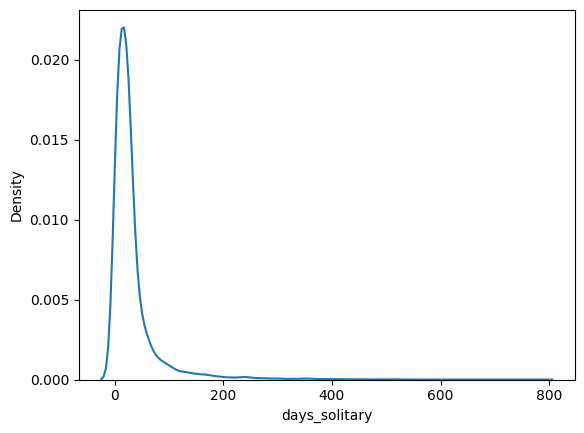

In [26]:
#distribution plot of days in solitary 
sns.kdeplot(df["days_solitary"])

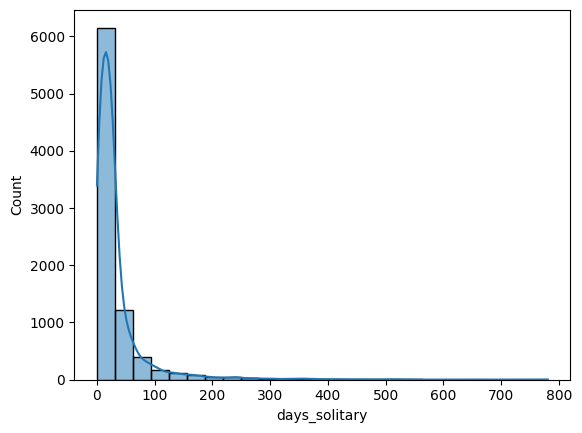

In [25]:
#distribution plot overlaid on histogram of days in solitary 
sns.histplot(data=df, x='days_solitary', kde=True, bins = 25)
plt.show()

In [23]:
#set percentage formatting
pd.set_option('display.float_format', '{:.2%}'.format)

In [24]:
#percent of inmates in solitary by citizenship
df['citizenship'].value_counts(normalize=True)


Mexico        31.55%
El Salvador   11.75%
Honduras       7.82%
Guatemala      5.23%
Jamaica        3.11%
               ...  
Mauritius      0.01%
Mongolia       0.01%
Bermuda        0.01%
Libya          0.01%
Singapore      0.01%
Name: citizenship, Length: 165, dtype: float64

In [21]:
#showing the top 20 citizenships of inmates in solitary 
df['citizenship'].value_counts()[:20]

Mexico                        2678
El Salvador                    997
Honduras                       664
Guatemala                      444
Jamaica                        264
Haiti                          248
Dominican Republic             207
Somalia                        199
Cuba                           151
Liberia                        129
Nigeria                        118
India                          118
Nicaragua                       97
Ghana                           79
Iraq                            78
Brazil                          60
Peru                            54
Iran                            54
Sierra Leone                    54
China, Peoples Republic Of      53
Name: citizenship, dtype: int64

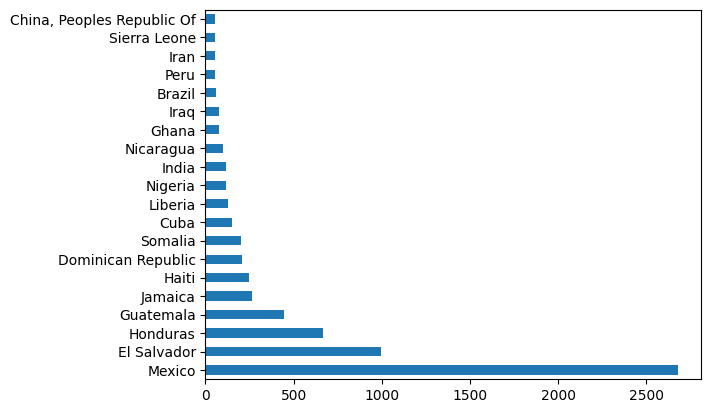

In [20]:
#barchart of top 20 citizenships 
df_counts = df['citizenship'].value_counts()[:20].plot(kind = 'barh')
